Comparison of predicting algorithms and techniques for an imbalanced dataset
by Galina Kulya A0223124
14.05.2021

#### Importing Libraries

In [1]:
import pandas as pd               # data processing
import numpy as np                # linear algebra
import matplotlib.pyplot as plt   # data visualisation
import seaborn as sns

# Warning messages are typically issued in situations where it is useful to alert
# the user of some condition in a program, where that condition (normally) doesn’t 
# warrant raising an exception and terminating the program.
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#### Load the Data.

Import the dataset into the notebook.

In [2]:
cocoa = pd.read_csv("flavors_of_cacao.csv")
cocoa.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
cocoa.shape

(1795, 9)

Data description:
The dataset contains 9 columns and 1795 rows.
Name of columns:
Company (Maker-if known)         - Name of the company manufacturing the bar.
Specific Bean Origin or Bar Name - The specific geo-region of origin for the bar.
Review Date                      - Date of publication of the review.
Cocoa Percent                    - Cocoa percentage (darkness) of the chocolate bar being reviewed.
Company Location                 - Manufacturer base country.
Rating                           - Expert rating for the bar.
Bean Type                        - The variety (breed) of bean used, if provided.
Broad Bean Origin                - The broad geo-region of origin for the bean.

#### Rename columns

The name of the attributes (column names) are renamed to make it easier to work with. The main reason is that in the original dataset the column names were taking two rows which would make our references to those columns uncomfortable as we need to include '\n' for the column names.

In [3]:
# Renaming the column name
new_col_names = ['company_name', 'bean_origin', "REF", "review_date", 'cocoa_percent',
                'company_location', 'rating', 'bean_type', 'country_origin']
cocoa = cocoa.rename(columns=dict(zip(cocoa.columns, new_col_names)))
cocoa.head()

,company_name,bean_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,country_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


#### Data Cleaning - Missing Values

Dealing with missing values is imperative due to it compromising the reliability of sample studies if left unchecked or incorrectly dealt with.

To check for some missing values, use sns.heatmap and isnull().sum() function.

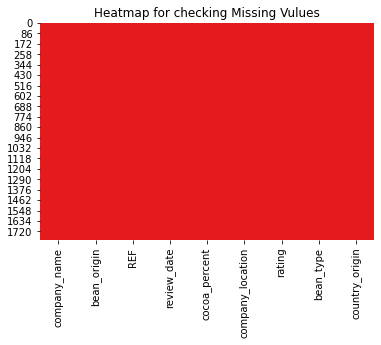

Fig 1: Heatmap for checking Missing Values


In [6]:
sns.heatmap(cocoa.isnull(), cbar = False, cmap='Set1')
plt.title('Heatmap for checking Missing Vulues')
plt.show()
print('Fig 1: Heatmap for checking Missing Values');

In [7]:
cocoa.isnull().sum()

company_name        0
bean_origin         0
REF                 0
review_date         0
cocoa_percent       0
company_location    0
rating              0
bean_type           1
country_origin      1
dtype: int64

It is only 2 rows with missing values. So we can just simply remove rows with missing values because it is just a small representation of this dataset (less than 10% has been the threshold). 

In [8]:
cocoa[cocoa.isnull().any(axis=1)]

,company_name,bean_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,country_origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


The missing beans are from Ven, Bolivia, D.R. This blend was named "Three Amigos (Chuao, Wild Bolivia, D.R.)". Let's check if there were any other similar blends. 

In [9]:
cocoa.loc[cocoa["bean_origin"] == "Three Amigos(Chuao, Wild Bolivia, D.R.)"]

,company_name,bean_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,country_origin
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


Three Amigos Beans (Chuao, Wild Bolivia, D.R.) have only been used by Soma once and the chocolates have received a fairly high rating of 4. Unfortunately, this missing value cannot be replaced, so we will have to delete it.

In [10]:
cocoa.loc[cocoa["bean_origin"] == "Madagascar"].head(10)

,company_name,bean_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,country_origin
11,A. Morin,Madagascar,1011,2013,70%,France,3.00,Criollo,Madagascar
37,Alain Ducasse,Madagascar,1215,2014,75%,France,3.00,Trinitario,Madagascar
60,Amano,Madagascar,129,2007,70%,U.S.A.,3.50,Trinitario,Madagascar
70,Ambrosia,Madagascar,1494,2015,66%,Canada,3.25,Trinitario,Madagascar
83,Amedei,Madagascar,123,2007,70%,Italy,4.00,Trinitario (85% Criollo),Madagascar
95,Ara,Madagascar,1375,2014,75%,France,3.00,Trinitario,Madagascar
133,Artisan du Chocolat,Madagascar,363,2009,80%,U.K.,3.00,"Criollo, Trinitario",Madagascar
183,Beschle (Felchlin),Madagascar,636,2011,64%,Switzerland,3.00,Trinitario,Madagascar
220,Blue Bandana,Madagascar,911,2012,70%,U.S.A.,3.75,Trinitario,Madagascar
244,Bonnat,Madagascar,75,2006,75%,France,4.00,Trinitario,Madagascar


Since "Madagascar" bean do not have regions, we can replace NaN with "Madagascar".

In [6]:
cocoa_mad = cocoa.copy()
cocoa_mad.loc[cocoa["bean_origin"] == "Madagascar", "country_origin"] = "Madagascar"

We have got 2 tables for comparison: first - with "Madagascar" replace NaN (cocoa_mad) and second - we droped both NaNs (cocoa).

In [4]:
cocoa = cocoa.dropna(axis=0)
cocoa.isnull().sum()

company_name        0
bean_origin         0
REF                 0
review_date         0
cocoa_percent       0
company_location    0
rating              0
bean_type           0
country_origin      0
dtype: int64

In [7]:
cocoa_mad = cocoa_mad.dropna(axis=0)
cocoa_mad.isnull().sum()

company_name        0
bean_origin         0
review_date         0
cocoa_percent       0
company_location    0
rating              0
bean_type           0
country_origin      0
dtype: int64

Perfect

#### Data Exploration and Visualization

Let's check what data types this dataset consists of.

In [14]:
cocoa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      1793 non-null   object 
 1   bean_origin       1793 non-null   object 
 2   REF               1793 non-null   int64  
 3   review_date       1793 non-null   int64  
 4   cocoa_percent     1793 non-null   object 
 5   company_location  1793 non-null   object 
 6   rating            1793 non-null   float64
 7   bean_type         1793 non-null   object 
 8   country_origin    1793 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 140.1+ KB


This dataset contains both numeric and categorical variables:
"rating" - float,
"REF" and "review_date"  - integer,
the rest - object. 

In [15]:
cocoa.nunique(axis=0)

company_name         416
bean_origin         1038
REF                  440
review_date           12
cocoa_percent         45
company_location      60
rating                13
bean_type             41
country_origin        99
dtype: int64

Bean_origin contains 1038 unique values, which means 283 values (15.7%) appear only once. A similar problem occurs for company_name as well.

##### Explore Relationship between "REF"  and "review_date" columns.

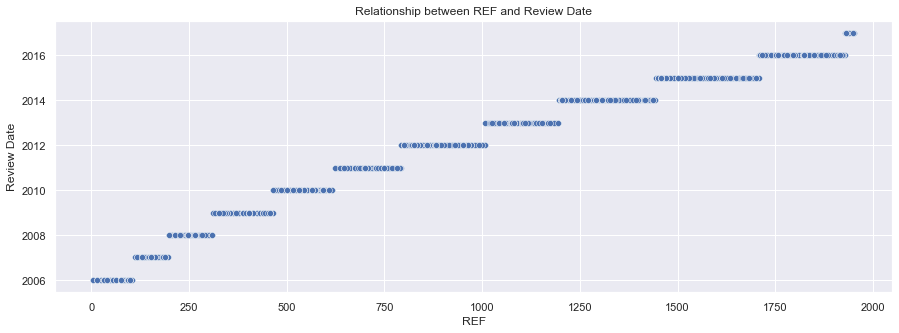

Fig 2: Relationship between REF and Review Date.


In [16]:
#Now, Let's find out how the percentage of cocoa affects the rating of a chocolate bar

figure = plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.scatterplot(x="REF", y="review_date", data=cocoa)
plt.xlabel('REF')
plt.ylabel('Review Date')
plt.title('Relationship between REF and Review Date')
plt.show()
print('Fig 2: Relationship between REF and Review Date.');

It is clear from the figure, there is a direct dependence of REF on the year when the review was made. Let's check if the dependence of the Review Date on the rating.

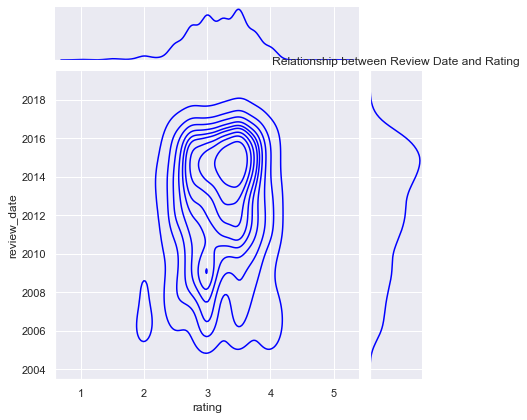

Fig 3: Relationship between Review Date and Rating (jointplot).


In [17]:
sns.jointplot(data = cocoa, x = 'rating', y= 'review_date', kind='kde', color = 'blue')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.title('Relationship between Review Date and Rating')
plt.show()
print('Fig 3: Relationship between Review Date and Rating (jointplot).');

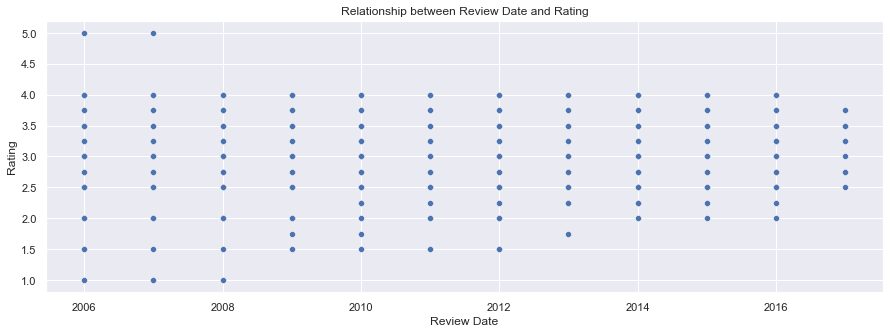

Fig 4: Relationship between Review Date and Rating (scatterplot).


In [18]:
figure = plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.scatterplot(x="review_date", y="rating", data=cocoa)
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.title('Relationship between Review Date and Rating')
plt.show()
print('Fig 4: Relationship between Review Date and Rating (scatterplot).');

Apparently, in recent years, no one has received a rating either above 4 or below 2.

It is impossible to train the algorithm on a table with these 2 columns ("REF" and "review_date"), since this information will be completely useless for new data, so we will delete them from the table.

In [8]:
cocoa = cocoa.drop("REF", axis=1)
cocoa_mad = cocoa_mad.drop("REF", axis=1)
cocoa = cocoa.drop("review_date", axis=1)
cocoa_mad = cocoa_mad.drop("review_date", axis=1)

KeyError: "['REF'] not found in axis"

##### Explore "cocoa_percent" column.

The main ingridient of chocolate is cocoa. 

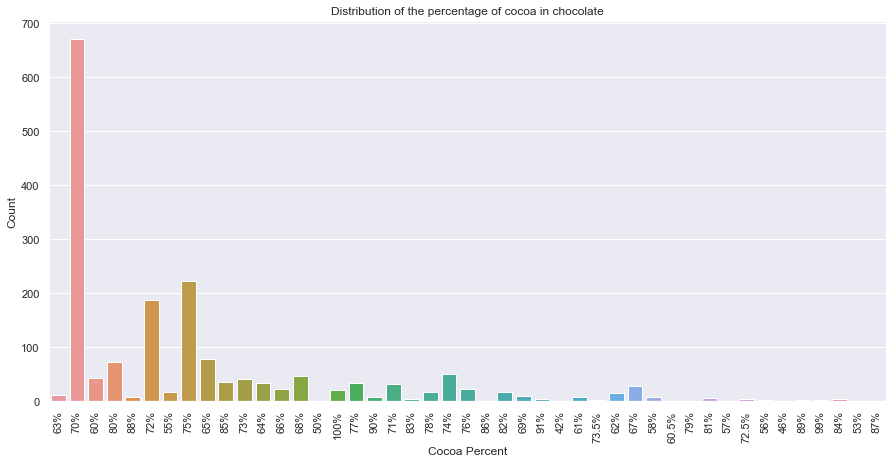

Fig 5: Distribution of the percentage of cocoa in chocolate.


In [20]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.countplot(x='cocoa_percent', data = cocoa)
plt.xlabel('Cocoa Percent')
plt.ylabel('Count')
plt.title('Distribution of the percentage of cocoa in chocolate')
plt.show()
print('Fig 5: Distribution of the percentage of cocoa in chocolate.');

Let's create a copy of the table in which the cocoa percentages will be converted to numeric ones.
To do this, we overlay the lambda function on the column and separate the % from the name, converting the value to float. This will be useful for comparative analysis in the future. And after plot it again.

In [9]:
cocoa_fl = cocoa.copy()
cocoa_fl_mad = cocoa_mad.copy()
cocoa_fl['cocoa_percent'] = cocoa_fl['cocoa_percent'].apply(lambda x: float(x.strip('%')))
cocoa_fl_mad['cocoa_percent'] = cocoa_fl_mad['cocoa_percent'].apply(lambda x: float(x.strip('%')))
cocoa_fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      1793 non-null   object 
 1   bean_origin       1793 non-null   object 
 2   review_date       1793 non-null   int64  
 3   cocoa_percent     1793 non-null   float64
 4   company_location  1793 non-null   object 
 5   rating            1793 non-null   float64
 6   bean_type         1793 non-null   object 
 7   country_origin    1793 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 126.1+ KB


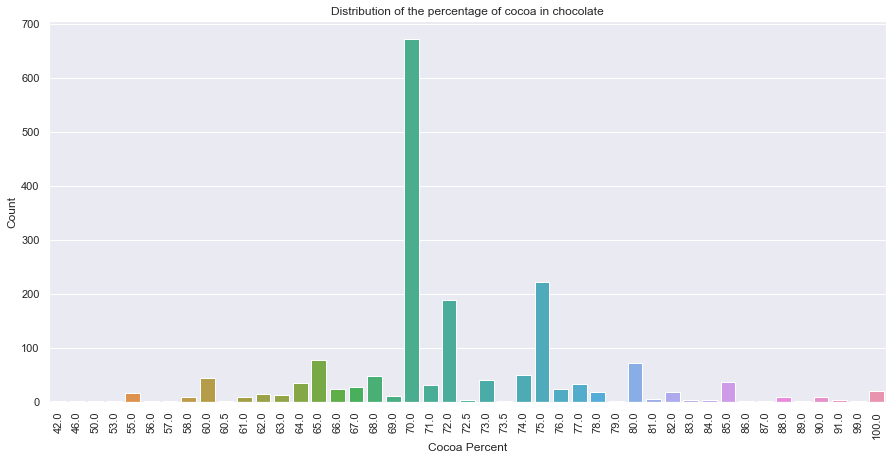

Fig 6: Distribution of the percentage of cocoa in chocolate.


In [22]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.countplot(x='cocoa_percent', data = cocoa_fl)
plt.xlabel('Cocoa Percent')
plt.ylabel('Count')
plt.title('Distribution of the percentage of cocoa in chocolate')
plt.show()
print('Fig 6: Distribution of the percentage of cocoa in chocolate.');

The percentage of cocoa varies from 42% to 100% with a maximum of elements in 70%.

In [23]:
cocoa_fl.sort_values("cocoa_percent", ascending=True).head(5)

,company_name,bean_origin,cocoa_percent,company_location,rating,bean_type,country_origin
429,Chokolat Elot (Girard),Guadeloupe,42.0,Martinique,2.75,,Martinique
984,Luker,Selva,46.0,Colombia,2.75,,"Colombia, Ecuador"
90,AMMA,"Monte Alegre, 3 diff. plantations",50.0,Brazil,3.75,Forastero (Parazinho),Brazil
1423,Santander (Compania Nacional),Colombian Semi Dark,53.0,Colombia,2.00,Forastero (Nacional),Colombia
1350,Q Chocolate,Brazil,55.0,Brazil,2.75,,Brazil


In [24]:
cocoa_fl.loc[cocoa_fl["cocoa_percent"] == 42]

,company_name,bean_origin,cocoa_percent,company_location,rating,bean_type,country_origin
429,Chokolat Elot (Girard),Guadeloupe,42.0,Martinique,2.75,,Martinique


In [25]:
cocoa_fl["cocoa_percent"].value_counts(ascending=True).head(20)

60.5    1
87.0    1
46.0    1
79.0    1
53.0    1
42.0    1
50.0    1
86.0    1
57.0    1
73.5    2
89.0    2
56.0    2
99.0    2
91.0    3
83.0    4
72.5    4
84.0    4
81.0    5
90.0    8
61.0    8
Name: cocoa_percent, dtype: int64

A certain percentage of cocoa appears only once, and this can create some difficulties in the subsequent prediction and for train-test split.

##### Explore "rating" column.

The dataset had total 9 attributes including the target attribute which is the rating for the chocolate. The problem statement is to classify the rating for the chocolated based on the value of the attributes. This problem was addressed as a classification problem since there were discrete values for the rating in the dataset.

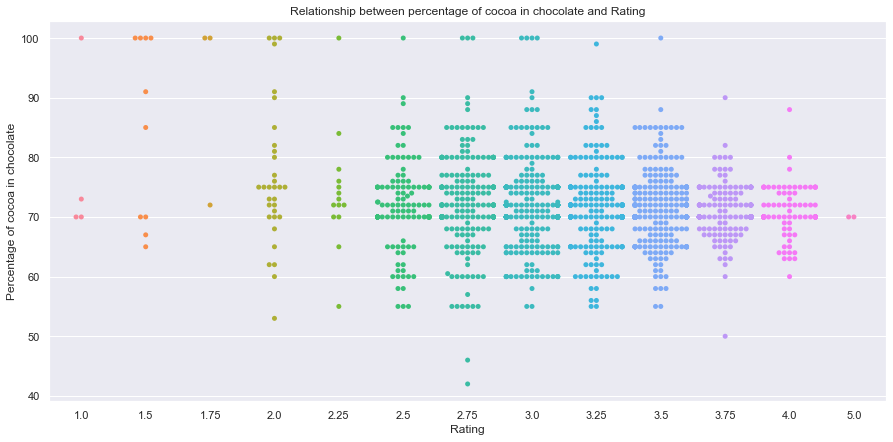

Fig 7: Relationship between percentage of cocoa in chocolate and Rating.


In [26]:
fig, ax = sns.mpl.pyplot.subplots(figsize=(15,7))
sns.swarmplot( data = cocoa_fl, x = 'rating',ax = ax, y = 'cocoa_percent', orient = 'v')
plt.xlabel('Rating')
plt.ylabel('Percentage of cocoa in chocolate')
plt.title('Relationship between percentage of cocoa in chocolate and Rating')
plt.show()
print('Fig 7: Relationship between percentage of cocoa in chocolate and Rating.');

The highest marks are given to chocolate in a narrow 60% - 80% of cocoa. A range of 90% or more cocoa does not get very good ratings. There are all kinds of %-ages ranging from 2.5 to 3.5. An Excellent 5 rating receive only chocolates with 70% of cocoa.

Let's look at the chocolate bars with rating 5.

In [27]:
cocoa.loc[cocoa["rating"] == 5]

,company_name,bean_origin,cocoa_percent,company_location,rating,bean_type,country_origin
78,Amedei,Chuao,70%,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,70%,Italy,5.0,Blend,


In [28]:
cocoa["rating"].value_counts()

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    126
4.00     97
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: rating, dtype: int64

A certain rating appears less then 5 times. Such a dataset is called an Imbalanced Dataset where the majority class is much larger than the minority class. This can create some difficulties in the subsequent prediction and for train-test split.

To better understand what is going on,  visualize the data.

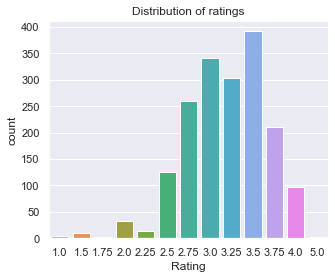

Fig 8: Distribution of ratings.


In [29]:
f,ax = plt.subplots(figsize=(5, 4)) 
sns.countplot(x = cocoa['rating'], ax=ax) 
plt.title("Rating",fontsize=15)
plt.xlabel('Rating')
plt.title('Distribution of ratings')
plt.show()
print('Fig 8: Distribution of ratings.');

We can't use "Under Sampling" Techniques to handle the imbalance in a dataset with high cardinality features. And we can't use "SMOTE (Synthetic Minority Over-sampling Technique)" as it is not very effective for high dimensional data. Just rounding the values of rating to its nearest whole number so we can increase the prediction of the model.

We create 2 tables for each tables with numeric and categorical values for "Cocoa_percent" for 5 levels and 3 levels rating in order to compare how it will affect the prediction. It will be 4 tables in total.

In [10]:
cocoa_rat_5_fl = cocoa_fl.copy()
cocoa_rat_5_fl_mad = cocoa_fl_mad.copy()

cocoa_rat_5_str = cocoa.copy()
cocoa_rat_5_str_mad = cocoa_mad.copy()

def round_rating(rating):
    if (rating < 1 ):
        return 0
    elif (rating >= 1 ) and (rating < 2 ):
        return 1
    elif (rating >= 2 ) and (rating < 3 ):
        return 2
    elif (rating >= 3 ) and (rating < 4 ):
        return 3
    elif (rating >= 4 ) and (rating < 5 ):
        return 4
    else:
        return 5
    
cocoa_rat_5_fl['rating'] = cocoa_rat_5_fl['rating'].apply(round_rating)
cocoa_rat_5_fl_mad['rating'] = cocoa_rat_5_fl_mad['rating'].apply(round_rating)

cocoa_rat_5_str['rating'] = cocoa_rat_5_str['rating'].apply(round_rating)
cocoa_rat_5_str_mad['rating'] = cocoa_rat_5_str_mad['rating'].apply(round_rating)

cocoa_rat_5_fl["rating"].value_counts()

3    1246
2     431
4      97
1      17
5       2
Name: rating, dtype: int64

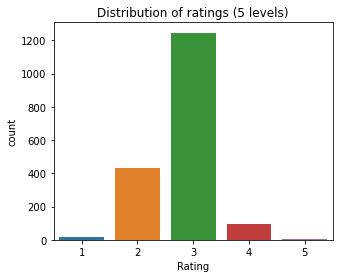

Fig 9: Distribution of ratings (5 levels).


In [11]:
f,ax = plt.subplots(figsize=(5, 4)) 
sns.countplot(x = cocoa_rat_5_fl['rating'], ax=ax) 
plt.title("Rating",fontsize=15)
plt.xlabel('Rating')
plt.title('Distribution of ratings (5 levels)')
plt.show()
print('Fig 9: Distribution of ratings (5 levels).');

In [12]:
cocoa_rat_3_fl = cocoa_fl.copy()
cocoa_rat_3_fl_mad = cocoa_fl_mad.copy()

cocoa_rat_3_str = cocoa.copy()
cocoa_rat_3_str_mad = cocoa_mad.copy()

# Function to convert the values for the  rating to its nearest whole number
def round_rating(rating):
    if (rating < 3 ):
        return 1
    elif (rating >= 3 ) and (rating < 4 ):
        return 2
    else:
        return 3

cocoa_rat_3_fl['rating'] = cocoa_rat_3_fl['rating'].apply(round_rating)
cocoa_rat_3_fl_mad['rating'] = cocoa_rat_3_fl_mad['rating'].apply(round_rating)

cocoa_rat_3_str['rating'] = cocoa_rat_3_str['rating'].apply(round_rating)
cocoa_rat_3_str_mad['rating'] = cocoa_rat_3_str_mad['rating'].apply(round_rating)

cocoa_rat_3_fl["rating"].value_counts()      

2    1246
1     448
3      99
Name: rating, dtype: int64

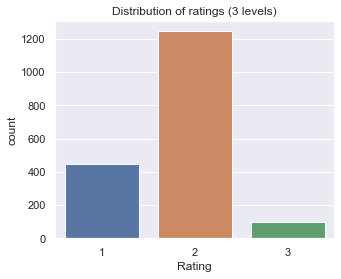

Fig 10: Distribution of ratings (3 levels).


In [33]:
f,ax = plt.subplots(figsize=(5, 4)) 
sns.countplot(x = cocoa_rat_3_fl['rating'], ax=ax) 
plt.title("Rating",fontsize=15)
plt.xlabel('Rating')
plt.title('Distribution of ratings (3 levels)')
plt.show()
print('Fig 10: Distribution of ratings (3 levels).');

5 against  3!!!!!

#### Data Preposition.

Before start prediction need do some preprocessing.

##### Data splitting.

As a result we create 2 lists of labels and tables without labels separate with 4 elements in each.

In [13]:
data = [cocoa_rat_5_fl,
        cocoa_rat_5_str,
        cocoa_rat_3_fl,
        cocoa_rat_3_str,]
data_mad = [cocoa_rat_5_fl_mad,
        cocoa_rat_5_str_mad,
        cocoa_rat_3_fl_mad,
        cocoa_rat_3_str_mad]

#### Prediction

Let's create function  predict() with input parameters as list of datasets, labels and selected algorithms. 
In a body of function we splitting the each dataset on train and test elements (80% via 20%), encoding each element independently with LabelEncoder() and normalizing with MinMaxScaler. 
After that calculate accuracy with accuracy_score() from sklearn.metrics and gathering it in a list for each algorithm.
As output we create a DataFrame "result" of accuracy score for each algorithm as name of columns and each dataset as index of rows.

In [14]:
result = pd.DataFrame() #create a new dataframe
acc_alg = []
def predict(datalist,algorithmlist):
    # Function for prediction using different datasets, labels and algoritms as input parameters
    count = 0 # counting each iteration for better controlling in process
    global acc_alg
        
    for num in range(len(algorithmlist)):
        for pos in range(len(datalist)):             
        
            # Data splitting
            cocoa_features = datalist[pos].copy()
            features = cocoa_features.drop('rating', axis=1)
            labels = cocoa_features['rating'].astype(str) # change label values into string
        
            # Splitting the each dataset on train and test elements
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.2, random_state=42)
               
            # Encoding train table with LabelEncoder()
            cols_train = X_train.columns.tolist()               
            X_train[cols_train] = X_train[cols_train].apply(LabelEncoder().fit_transform)
                
            # Encoding test table with LabelEncoder()
            cols_test = X_test.columns.tolist()
            X_test[cols_test] = X_test[cols_test].apply(LabelEncoder().fit_transform)
                
            # Fit the algorithm and make the prediction on test dataset
            y_pred = algorithmlist[num].fit(X_train, y_train).predict(X_test)
                
            # Calculating the accuracy score
            acc = (accuracy_score(y_test, y_pred)*100).round(2)
                
            # All value collecting in one list of values for each algorithm
            acc_alg.append(acc)
                
            count = count + 1
            print(count)
                        
            # Normalazing train and test tables with MinMaxScaler()
            X_train  = scaler.fit_transform(X_train)
            X_test  = scaler.fit_transform(X_test)
        
            # Fit the algorithm and make the prediction on test dataset
            y_pred = algorithmlist[num].fit(X_train, y_train).predict(X_test)
                
            # Calculating the accuracy score
            acc = (accuracy_score(y_test, y_pred)*100).round(2)
                
            # Addind value to list of values for each algorithm
            acc_alg.append(acc)
            count = count + 1
            print(count)
                                    
        result[num]  = acc_alg        
        acc_alg = [] # cleaning list of accuracy score for new algorithm      
    return result

In [15]:
def rename_dataset(dataset):
    algorithm = ["GaussianNB",
             "CategoricalNB",
             "KNeighborsClassifier",
             "DecisionTreeClassifier_gini",
             "DecisionTreeClassifier_enthropy",
             "DecisionTreeClassifier",
             "RandomForestClassifier",
             "SVC"]
    dataset["data"] = ["encode-rating5-percentfloat","norm-rating5-percentfloat",
                       "encode-rating5-percentstring","norm-rating5-percentstring",
                       "encode-rating3-percentfloat","norm-rating3-percentfloat",
                       "encode-rating3-percentstring","norm-rating3-percentstring"]
    
    dataset = dataset.rename(columns=dict(zip(dataset.columns, algorithm)))
    cols = list(dataset.columns) #list of name columns 
    dataset = dataset[[cols[-1]] + cols[0:8]]

    dataset
    return dataset


##### Import labraries

In [16]:
# Function for splitting dataset on train and test part
from sklearn.model_selection import train_test_split

# Function for transromation data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Algorithms for prediction
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Function for calculating accuracy score
from sklearn.metrics import accuracy_score

# For plotting Tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree

##### Selection Machine Learning Algorithms

For prediction chose algorithms (in report I discuss deeper). 

In [17]:
gnb = GaussianNB()
cnb = CategoricalNB()
knn = KNeighborsClassifier(n_neighbors=3) 
dtc_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 42, 
                                  max_depth = 3, 
                                  min_samples_leaf = 5)
dtc_entropy = DecisionTreeClassifier(criterion = "entropy",
                                  random_state = 42, 
                                  max_depth = 3, 
                                  min_samples_leaf = 5)
clf = DecisionTreeClassifier()
rfc = RandomForestClassifier(random_state=42, max_depth= 4, max_leaf_nodes= 4,\
                                       min_samples_split= 35, n_estimators= 6)
svc = SVC(kernel="rbf", gamma="auto")

alg_list = [gnb,cnb,knn,dtc_gini,dtc_entropy,clf,rfc,svc] # make a list of algorithms

Let's make a prediction for 4 different tables and 8 algorithms. As output it will be a Data Frame of accuracy score.

In [18]:
result_6 = predict(data,alg_list)
result_6 = rename_dataset(result_6)

C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

1
2
3
4
5
6
7
8
9
10


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

11
12
13
14
15
16
17
18


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

19
20
21
22
23
24


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

43
44
45
46
47
48
49
50


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

51
52
53
54
55
56


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

57
58


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


59
60


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


61
62


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


63
64


In [19]:
result_6

,data,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
0,encode-rating5-percentfloat,71.31,32.03,62.12,71.31,71.59,50.70,71.59,71.59
1,norm-rating5-percentfloat,72.14,71.31,64.07,70.75,71.31,57.38,71.59,71.59
2,encode-rating5-percentstring,71.31,31.48,62.12,69.36,71.87,51.53,71.59,71.59
3,norm-rating5-percentstring,71.87,71.03,64.07,69.64,71.31,59.61,71.31,71.59
4,encode-rating3-percentfloat,70.75,35.38,62.12,71.31,71.59,49.86,71.59,71.59
5,norm-rating3-percentfloat,71.31,71.31,64.90,70.47,71.31,60.17,71.59,71.59
6,encode-rating3-percentstring,71.03,35.10,62.12,70.19,70.19,40.67,71.59,71.59
7,norm-rating3-percentstring,71.87,71.03,65.46,71.59,71.59,60.45,71.59,71.59


Create a function for finding maximum value of an accuracy score in a table. 

In [94]:
def maximum(dataset):
    dataset = dataset.drop('data', axis=1)
    max = dataset.values.max()
    return max 

Find the maximum value in dataframe.

In [95]:
max_6 = maximum(result_6)
max_6

72.42

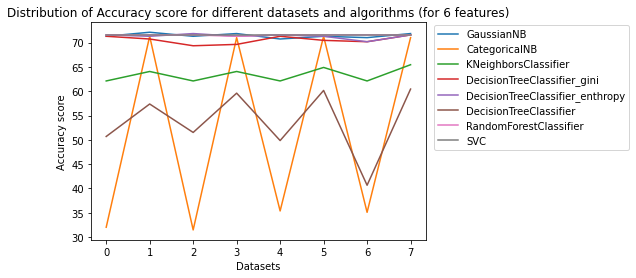

Fig 11: Distribution of Accuracy score for different datasets and algorithms (for 6 features).


In [20]:
result_6.plot(legend=True) 

plt.xlabel('Datasets')
plt.ylabel('Accuracy score')
plt.title('Distribution of Accuracy score for different datasets and algorithms (for 6 features)')
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left', ncol=1)
plt.show()

print('Fig 11: Distribution of Accuracy score for different datasets and algorithms (for 6 features).');

The maximum value is 72.42% for GaussianNB and RandomForestClassifier algorithms. Let's check for datasets.

In [97]:
result_6.loc[result_6["GaussianNB"] == max_6]

,data,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
5,norm-rating3-percentfloat,72.42,71.31,61.56,70.47,71.31,61.28,71.31,71.59


In [98]:
result_6.loc[result_6["RandomForestClassifier"] == max_6]

,data,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
1,norm-rating5-percentfloat,72.14,71.31,61.28,70.75,71.31,58.5,72.42,71.59


It seems that the most important element was encoding the percentage of cocoa as a float value and normalizing it. But for GaussianNB  the rating has 5 variables and for RandomForestClassifier the rating has 3 variables.

Make a prediction for datasets with "Madagascar" replacing missing value.

In [99]:
result_6_mad = predict(data_mad,alg_list)
result_6_mad = rename_dataset(result_6_mad)

C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

18
19
20
21
22
23
24


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

25
26
27
28
29
30
31
32
33
34
35


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

36
37
38
39
40
41
42
43
44


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

45
46
47
48
49
50
51


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

52
53
54
55
56


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


57
58


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


59
60


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


61
62


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


63
64


In [100]:
result_6_mad

,data,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
0,encode-rating5-percentfloat,69.92,39.83,60.72,69.64,70.19,39.55,70.19,70.19
1,norm-rating5-percentfloat,70.19,69.08,59.89,68.80,69.64,61.28,70.19,70.19
2,encode-rating5-percentstring,70.47,39.55,61.28,67.41,69.92,40.95,70.47,70.19
3,norm-rating5-percentstring,70.19,69.08,59.33,67.97,69.92,63.23,70.19,70.19
4,encode-rating3-percentfloat,69.92,42.34,61.00,69.64,70.19,41.50,70.19,70.19
5,norm-rating3-percentfloat,70.47,69.08,60.72,68.80,69.64,62.12,69.92,70.19
6,encode-rating3-percentstring,69.92,42.34,61.56,69.36,69.36,44.01,70.19,70.19
7,norm-rating3-percentstring,69.92,69.08,60.45,69.08,69.08,60.72,70.75,70.19


In [101]:
max_6_mad = maximum(result_6_mad)
max_6_mad

70.75

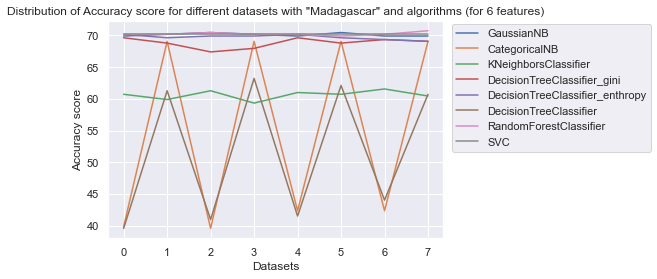

Fig 12: Distribution of Accuracy score for different datasets with "Madagascar" and algorithms (for 6 features).


In [102]:
result_6_mad.plot(legend=True) 

plt.xlabel('Datasets')
plt.ylabel('Accuracy score')
plt.title('Distribution of Accuracy score for different datasets with "Madagascar" and algorithms (for 6 features)')
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left', ncol=1)
plt.show()

print('Fig 12: Distribution of Accuracy score for different datasets with "Madagascar" and algorithms (for 6 features).');

Let's compare this two datasets.

In [103]:
def comparison(table1,table2):
    df1 = table1.copy()
    df2 = table2.copy()
    compare = df2.loc[:,"GaussianNB":] = df2.loc[:,"GaussianNB":].div(df1.loc[:,"GaussianNB":]).mul(100)
    compare = compare.loc[:,"GaussianNB":] = compare.where(compare.loc[:,"GaussianNB":].isna(),
                                                         compare.round(2))
    #compare = rename_dataset(compare)
    return compare

In [104]:
compare_6v6mad = comparison(result_6,result_6_mad)
compare_6v6mad

,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
0,98.05,129.99,96.89,97.66,98.04,75.93,98.04,98.04
1,97.30,96.87,97.73,97.24,97.66,104.75,96.92,98.04
2,98.44,130.27,97.78,97.19,97.29,92.46,98.44,98.04
3,97.30,97.25,98.60,97.60,98.05,107.08,97.66,98.04
4,98.05,125.64,97.34,97.66,98.04,79.24,98.04,98.04
5,97.31,96.87,98.64,97.63,97.66,101.37,98.05,98.04
6,97.67,126.65,98.23,98.82,98.82,87.77,98.04,98.04
7,96.92,97.25,100.00,96.49,96.49,100.45,98.07,98.04


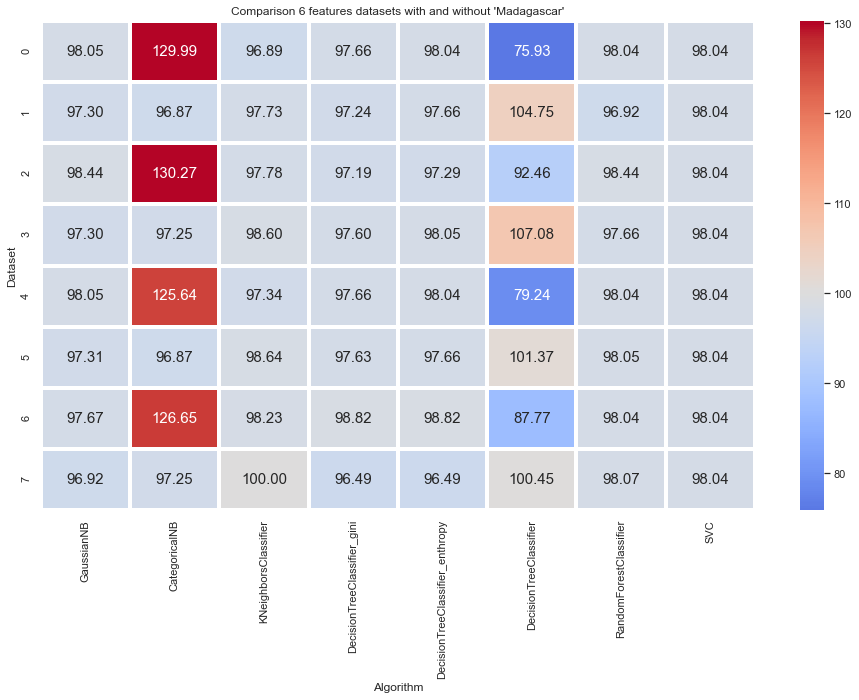

Fig 13: Comparison 6 features datasets with and without 'Madagascar'


In [105]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(compare_6v6mad,cmap="coolwarm",
                 center = 100.0,
                 annot = True,fmt='.2f', 
                 annot_kws={"size": 15},
                 linewidths=4)
 
ax.set_title("Comparison 6 features datasets with and without 'Madagascar'")
ax.set(xlabel="Algorithm")
ax.set(ylabel="Dataset") 
#sns.set(fontsize=10) # set fontsize 2
 
plt.show()
print("Fig 13: Comparison 6 features datasets with and without 'Madagascar'");

##### Correlation Matrix

Let's explore the correlation between the categorical values. This will give a better understanding of how the attributes are related to one another.

First of all, let's take one table from the list and encode it.

In [110]:
cocoa_encoded = data[0] # Take first table from our list of datasets
label = cocoa_encoded["rating"]
cocoa_encoded = cocoa_encoded.drop('rating', axis=1)
cols = cocoa_encoded.columns.tolist()               
cocoa_encoded[cols] = cocoa_encoded[cols].apply(LabelEncoder().fit_transform) # Encode dataset 

And then generating a Correlation Matrix.

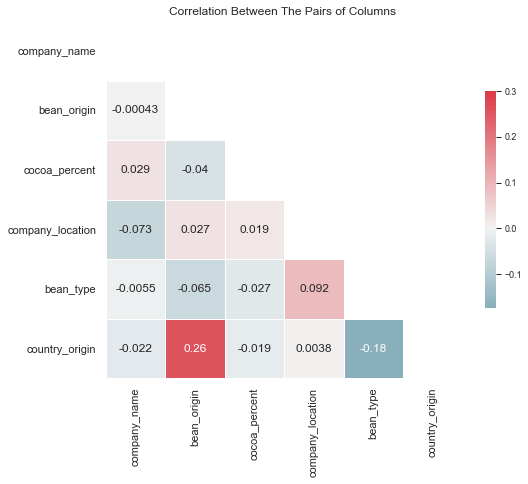

Fig 14: Correlation Between The Pairs of Columns.


In [111]:
# Finding out the correlation between the features in the dataset

sns.set(style="white")

# Compute the correlation matrix
corr = cocoa_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12, "axes.labelsize":12})

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Between The Pairs of Columns ')
plt.show()
print('Fig 14: Correlation Between The Pairs of Columns.');

It is clear that there a maximum correlation between bean_origin and country_origin (0.26) as in some cells this name identical. The next maximum is bean_type and company_location (0.092). Some countries prefer to produce chocolate from certain varieties of cocoa beans from certain bean origin (0.027), but this does not apply to companies (-0,0055). They rather prefer certain percent of cocoa (0.029). 

##### Relative Feature importance

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. 

Extremely Randomized Trees (Extra Trees) is like Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits.

Feature importance scores can be fed to a wrapper model, such as the SelectFromModel class, to perform feature selection.

The variability of all the features company_name        15574.596441
bean_origin         85098.160467
cocoa_percent          44.682105
company_location      431.424350
bean_type             130.222434
country_origin        882.566391
dtype: float64
Dataset Size Before Feature Selection 
(1793, 6)
Dataset Size After Feature Selection 
(1793, 3)
Relative Feature importance for each of the Features- 
[0.23416743 0.23803051 0.18347679 0.11652386 0.07899885 0.14880257]


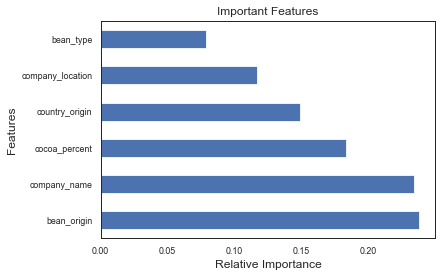

Fig 15: Important Features.


In [112]:
from sklearn.feature_selection import SelectFromModel # Meta-transformer for selecting features based on importance weights.
from sklearn.ensemble import ExtraTreesClassifier # Randomizes certain decisions and subsets of data to minimize
                                                  # over-learning from the data and overfitting

X = cocoa_encoded # Encoding dataset 
y = label
            
#Printing the variability of all the features
print("The variability of all the features", X.var())
#Since the Variability of any column is not very low so selecting all the features based on variability
        
# Using ExtraTreesClassifier for feature selection
model = ExtraTreesClassifier()
model.fit(X,y)
        
print ("Dataset Size Before Feature Selection ")
print( X.shape)
            
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_ 
            
model = SelectFromModel(clf, prefit=True)
X_feat_select = model.transform(X)
            
print ("Dataset Size After Feature Selection ")
print (X_feat_select.shape )           
print ("Relative Feature importance for each of the Features- ")
print(clf.feature_importances_)
            
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.title('Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()
print('Fig 15: Important Features.')

The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. 

Feature importance can be used to improve a predictive model. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

Feature importance recommends decreasing features by 3, removing features with the lowest scores.

For our problem - high cardinality features (unordered categorical predictor variables with a high number of levels) we compare 2 cases removing features with the lowest scores and with a high number of levels.

Let's remove the columns and make the prediction again recalculating accuracy score. 

In [113]:
# For dataset where we removing features with the lowest scores

def drop(datalist):
    # Function for dropping columns from list of datasets
    data_drop = [] #create an empty list for new datasets with drop columns
    for pos in range(len(datalist)):
        data = datalist[pos].copy()
        data = data.drop("country_origin", axis=1)
        data = data.drop("bean_type", axis=1)
        data = data.drop("company_location", axis=1)
        data_drop.append(data)
    return data_drop

In [114]:
data_3 = drop(data)
data_3

[     company_name         bean_origin  cocoa_percent  rating
 0        A. Morin         Agua Grande           63.0       3
 1        A. Morin               Kpime           70.0       2
 2        A. Morin              Atsane           70.0       3
 3        A. Morin               Akata           70.0       3
 4        A. Morin              Quilla           70.0       3
 ...           ...                 ...            ...     ...
 1790       Zotter                Peru           70.0       3
 1791       Zotter               Congo           65.0       3
 1792       Zotter        Kerala State           65.0       3
 1793       Zotter        Kerala State           62.0       3
 1794       Zotter  Brazil, Mitzi Blue           65.0       3
 
 [1793 rows x 4 columns],
      company_name         bean_origin cocoa_percent  rating
 0        A. Morin         Agua Grande           63%       3
 1        A. Morin               Kpime           70%       2
 2        A. Morin              Atsane       

In [115]:
result_3 = predict(data_3,alg_list) #create a dataset with new accuracy score
result_3 = rename_dataset(result_3)

C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

1
2
3
4
5
6
7
8
9
10


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

29
30
31
32
33
34
35
36
37
38
39
40


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

41
42
43
44
45
46
47
48
49
50


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

51
52
53
54
55
56


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

57
58


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


59
60


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


61
62


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


63
64


In [116]:
result_3

,data,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
0,encode-rating5-percentfloat,71.59,61.00,61.84,71.31,71.59,55.99,71.59,71.59
1,norm-rating5-percentfloat,71.59,71.59,61.28,70.75,71.31,55.71,71.59,71.59
2,encode-rating5-percentstring,70.47,61.28,61.28,69.36,71.31,56.27,71.59,71.59
3,norm-rating5-percentstring,71.59,71.31,61.84,69.64,71.59,54.87,71.59,71.59
4,encode-rating3-percentfloat,71.87,60.72,62.12,71.31,71.31,52.37,71.59,71.59
5,norm-rating3-percentfloat,71.31,71.59,61.56,70.75,71.31,56.55,71.59,71.59
6,encode-rating3-percentstring,71.31,61.00,61.56,71.31,71.31,54.60,71.03,71.59
7,norm-rating3-percentstring,71.31,71.31,62.40,70.75,70.75,54.87,71.59,71.59


In [117]:
max_3 = maximum(result_3)
max_3

71.87

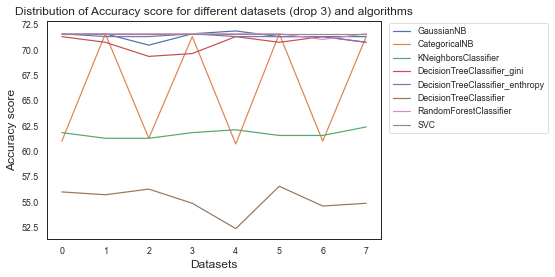

Fig 16: Distribution of Accuracy score for different datasets (drop 3) and algorithms (for 6 features).


In [118]:
result_3.plot(legend=True) 

plt.xlabel('Datasets')
plt.ylabel('Accuracy score')
plt.title('Distribution of Accuracy score for different datasets (drop 3) and algorithms')
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left', ncol=1)
plt.show()

print('Fig 16: Distribution of Accuracy score for different datasets (drop 3) and algorithms (for 6 features).');

In [119]:
result_3.loc[result_3["GaussianNB"] == max_3]

,data,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
4,encode-rating3-percentfloat,71.87,60.72,62.12,71.31,71.31,52.37,71.59,71.59


The maximum accuracy score 71.87% (slightly less than for 6 features tables) was for GaussianNB algorithm with 3 variables rating. It seems that the most important element was encoding the percentage of cocoa as a float value but not normalizing it. 

Let's compare 2 tables of accuracy score for 6 and 3 features datasets.

In [120]:
compare_3v6 = comparison(result_6,result_3)
compare_3v6

,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
0,100.39,199.09,98.68,100.00,100.00,107.49,100.00,100.0
1,99.24,100.39,100.00,100.00,100.00,95.23,98.85,100.0
2,98.44,201.84,97.78,100.00,99.22,127.05,100.00,100.0
3,99.24,100.39,102.78,100.00,100.39,92.92,99.61,100.0
4,100.79,180.18,99.12,100.00,99.61,100.00,100.00,100.0
5,98.47,100.39,100.00,100.40,100.00,92.28,100.39,100.0
6,99.61,182.47,98.23,101.60,101.60,108.90,99.22,100.0
7,98.85,100.39,103.23,98.83,98.83,90.77,99.24,100.0


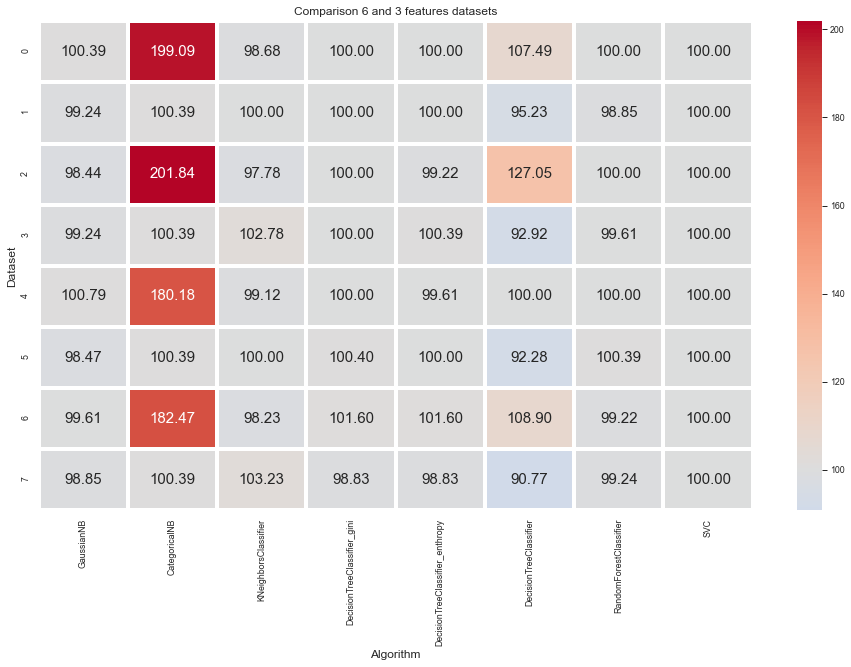

Fig 17: Comparison 6 and 3 features datasets.


In [121]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(compare_3v6,cmap="coolwarm",
                 center = 100.0,
                 annot = True,fmt='.2f', 
                 annot_kws={"size": 15},
                 linewidths=4)
 
ax.set_title("Comparison 6 and 3 features datasets")
ax.set(xlabel="Algorithm")
ax.set(ylabel="Dataset") 
#sns.set(fontsize=10) # set fontsize 2
 
plt.show()
print("Fig 17: Comparison 6 and 3 features datasets.");

In [122]:
# For dataset where we removing features with a high number of levels

def drop2(datalist):
    # Function for dropping columns from list of datasets
    data_drop2 = [] #create an empty list for new datasets with drop columns
    for pos in range(len(datalist)):
        data = datalist[pos].copy()
        data = data.drop("bean_origin", axis=1)
        data = data.drop("company_name", axis=1)
        data_drop2.append(data)
    return data_drop2

In [123]:
data_4 = drop2(data)
data_4

[      cocoa_percent company_location  rating  bean_type country_origin
 0              63.0           France       3                  Sao Tome
 1              70.0           France       2                      Togo
 2              70.0           France       3                      Togo
 3              70.0           France       3                      Togo
 4              70.0           France       3                      Peru
 ...             ...              ...     ...        ...            ...
 1790           70.0          Austria       3                      Peru
 1791           65.0          Austria       3  Forastero          Congo
 1792           65.0          Austria       3  Forastero          India
 1793           62.0          Austria       3                     India
 1794           65.0          Austria       3                    Brazil
 
 [1793 rows x 5 columns],
      cocoa_percent company_location  rating  bean_type country_origin
 0              63%           France 

In [124]:
result_4 = predict(data_4,alg_list) #create a dataset with new accuracy score
result_4 = rename_dataset(result_4)

C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

1
2
3
4
5
6
7
8
9
10


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

11
12
13
14
15
16
17
18


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

37
38
39
40
41
42
43
44
45
46
47


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

48
49
50
51
52
53
54


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

55
56
57
58


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


59
60


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


61
62


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


63
64


In [125]:
result_4

,data,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
0,encode-rating5-percentfloat,71.31,31.48,70.19,71.31,71.59,51.81,71.59,71.59
1,norm-rating5-percentfloat,72.42,71.31,59.33,70.47,71.03,52.92,71.31,71.59
2,encode-rating5-percentstring,71.87,31.48,70.19,71.31,71.59,57.38,72.70,71.59
3,norm-rating5-percentstring,72.42,71.03,58.22,71.03,71.87,51.53,72.14,71.59
4,encode-rating3-percentfloat,71.59,33.43,70.47,71.31,71.59,58.77,71.59,71.59
5,norm-rating3-percentfloat,72.42,71.31,59.33,70.47,71.31,55.71,71.59,71.59
6,encode-rating3-percentstring,71.87,33.43,70.47,70.19,70.19,52.65,72.14,71.59
7,norm-rating3-percentstring,72.14,71.03,58.22,71.59,71.59,55.15,70.47,71.59


In [126]:
max_4 = maximum(result_4)
max_4

72.7

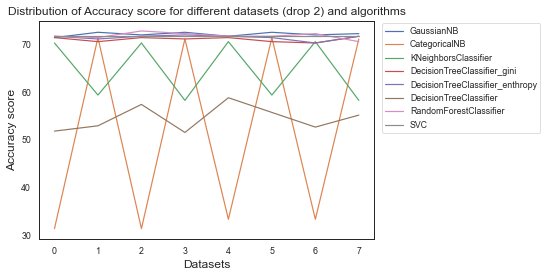

Fig 18: Distribution of Accuracy score for different datasets (drop 2) and algorithms.


In [127]:
result_4.plot(legend=True) 

plt.xlabel('Datasets')
plt.ylabel('Accuracy score')
plt.title('Distribution of Accuracy score for different datasets (drop 2) and algorithms')
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left', ncol=1)
plt.show()

print('Fig 18: Distribution of Accuracy score for different datasets (drop 2) and algorithms.');

In [128]:
result_4.loc[result_4["RandomForestClassifier"] == max_4]

,data,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
2,encode-rating5-percentstring,71.87,31.48,70.19,71.31,71.59,57.38,72.7,71.59


It seems that the most important element was encoding the percentage of cocoa as a float value, not a string.

In [129]:
data_3_mad = drop(data_mad)
data_3_mad

[     company_name         bean_origin  cocoa_percent  rating
 0        A. Morin         Agua Grande           63.0       3
 1        A. Morin               Kpime           70.0       2
 2        A. Morin              Atsane           70.0       3
 3        A. Morin               Akata           70.0       3
 4        A. Morin              Quilla           70.0       3
 ...           ...                 ...            ...     ...
 1790       Zotter                Peru           70.0       3
 1791       Zotter               Congo           65.0       3
 1792       Zotter        Kerala State           65.0       3
 1793       Zotter        Kerala State           62.0       3
 1794       Zotter  Brazil, Mitzi Blue           65.0       3
 
 [1794 rows x 4 columns],
      company_name         bean_origin cocoa_percent  rating
 0        A. Morin         Agua Grande           63%       3
 1        A. Morin               Kpime           70%       2
 2        A. Morin              Atsane       

In [130]:
result_3_mad = predict(data_3_mad,alg_list) #create a dataset with new accuracy score
result_3_mad = rename_dataset(result_3_mad)

C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

20
21
22
23
24
25
26
27
28


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

49
50
51
52
53
54
55
56


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

57
58


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


59
60


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


61
62


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


63
64


In [131]:
result_3_mad

,data,GaussianNB,CategoricalNB,KNeighborsClassifier,DecisionTreeClassifier_gini,DecisionTreeClassifier_enthropy,DecisionTreeClassifier,RandomForestClassifier,SVC
0,encode-rating5-percentfloat,70.19,62.95,61.56,69.64,70.19,56.82,70.19,70.19
1,norm-rating5-percentfloat,69.64,69.64,61.00,68.80,69.64,54.04,69.64,70.19
2,encode-rating5-percentstring,69.36,62.95,61.56,67.41,69.92,58.77,70.19,70.19
3,norm-rating5-percentstring,69.92,69.64,61.28,67.97,69.92,52.37,69.64,70.19
4,encode-rating3-percentfloat,70.75,62.12,62.40,69.64,70.19,59.89,70.19,70.19
5,norm-rating3-percentfloat,70.19,69.64,61.84,68.80,69.64,56.82,69.64,70.19
6,encode-rating3-percentstring,69.36,62.12,62.40,69.36,69.36,59.61,70.19,70.19
7,norm-rating3-percentstring,69.64,69.64,62.40,69.08,69.08,57.66,69.92,70.19


In [132]:
max_3_mad = maximum(result_3_mad)
max_3_mad

70.75

In [133]:
data_4_mad = drop2(data_mad)
result_4_mad = predict(data_4_mad,alg_list) #create a dataset with new accuracy score
result_4_mad = rename_dataset(result_4_mad)
max_4_mad = maximum(result_4_mad)
max_4_mad

C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

20
21
22
23
24
25
26
27
28


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

29
30
31
32
33
34
35
36
37
38
39
40


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

41
42
43
44
45
46
47
48
49


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

50
51
52
53
54
55


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

56


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


57
58


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


59
60


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


61
62


C:\Users\al200\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


63
64


71.03

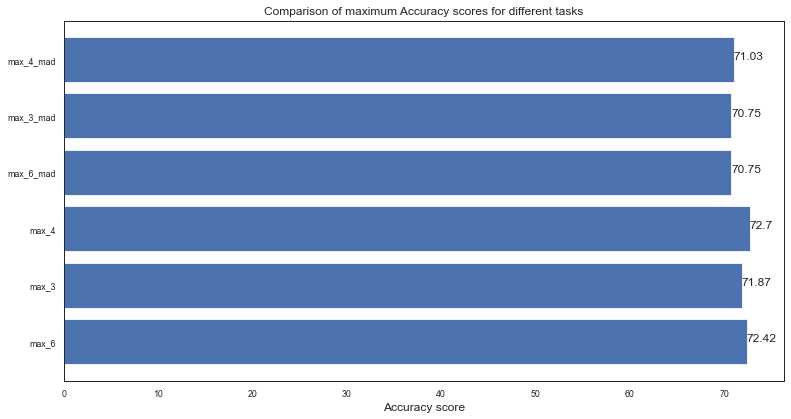

Fig 19: Comparison of maximum Accuracy scores for different tasks.


In [134]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

x = ['max_6','max_3','max_4','max_6_mad','max_3_mad','max_4_mad']
y = [max_6,max_3,max_4,max_6_mad,max_3_mad,max_4_mad]

ax.barh(x,y)

# Add annotation to bars
for index, value in enumerate(y):
    plt.text(value, index, str(value))


plt.xlabel('Accuracy score')
plt.title('Comparison of maximum Accuracy scores for different tasks')

plt.show()

print('Fig 19: Comparison of maximum Accuracy scores for different tasks.');

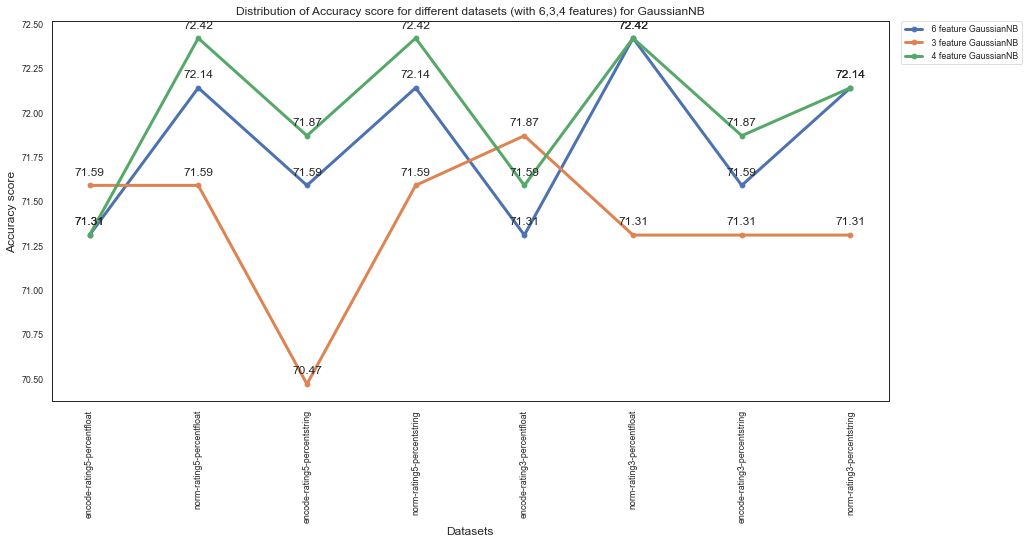

Fig 20: Distribution of Accuracy score for different datasets (with 6,3,4 features) for GaussianNB.


In [135]:
plt.figure(figsize=(15,7))
xn = result_6['data'].tolist()
y1 = result_6['GaussianNB'].tolist()
y2 = result_3['GaussianNB'].tolist()
y3 = result_4['GaussianNB'].tolist()

z1 = plt.plot(result_6['data'], y1,   label = ' 6 feature GaussianNB', marker='o', linewidth=3)
z2 = plt.plot(result_6['data'], y2,   label = ' 3 feature GaussianNB', marker='o', linewidth=3)
z3 = plt.plot(result_6['data'], y3,   label = ' 4 feature GaussianNB', marker='o', linewidth=3)

def annot(yn,zn):
    global xn
    for z in zn:
        for x,y in zip(xn,yn):
            label = "{:.2f}".format(y)

            plt.annotate(label,                  # this is the text
                 (x,y),                      # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10),              # distance from text to points (x,y)
                 ha='center')                # horizontal alignment can be left, right or center
        
annot(y1,z1)
annot(y2,z2)
annot(y3,z3)

plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left', ncol=1)
plt.xticks(rotation=90)
plt.xlabel('Datasets')
plt.ylabel('Accuracy score')
plt.title('Distribution of Accuracy score for different datasets (with 6,3,4 features) for GaussianNB')

plt.show()

print('Fig 20: Distribution of Accuracy score for different datasets (with 6,3,4 features) for GaussianNB.');

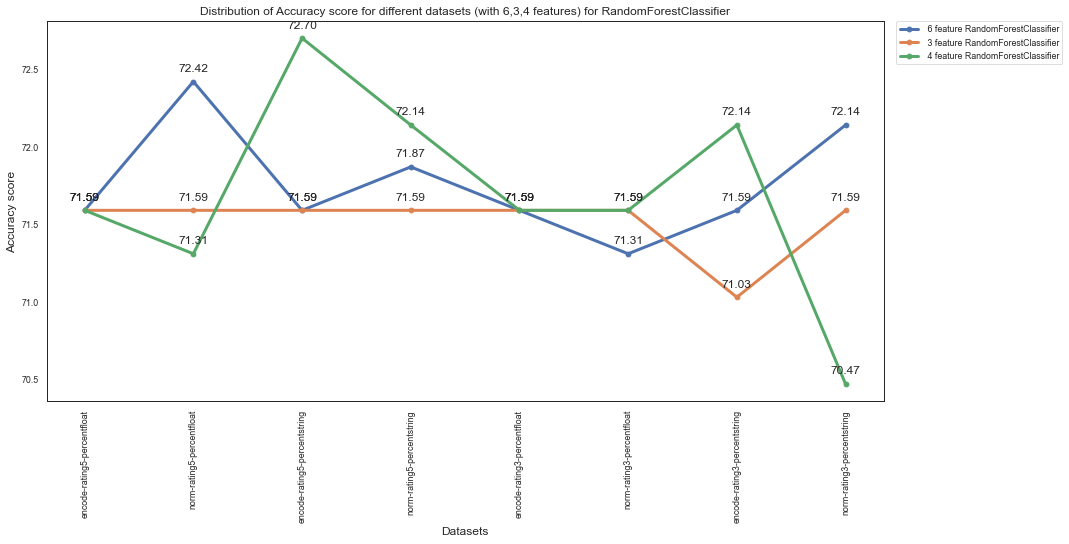

Fig 21: Distribution of Accuracy score for different datasets (with 6,3,4 features) for RandomForestClassifier.


In [136]:
plt.figure(figsize=(15,7))
xn = result_6['data'].tolist()
y4 = result_6['RandomForestClassifier'].tolist()
y5 = result_3['RandomForestClassifier'].tolist()
y6 = result_4['RandomForestClassifier'].tolist()

z4 = plt.plot(result_6['data'], y4,   label = ' 6 feature RandomForestClassifier', marker='o', linewidth=3)
z5 = plt.plot(result_6['data'], y5,   label = ' 3 feature RandomForestClassifier', marker='o', linewidth=3)
z6 = plt.plot(result_6['data'], y6,   label = ' 4 feature RandomForestClassifier', marker='o', linewidth=3)

def annot(yn,zn):
    global xn
    for z in zn:
        for x,y in zip(xn,yn):
            label = "{:.2f}".format(y)

            plt.annotate(label,                  # this is the text
                 (x,y),                      # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10),              # distance from text to points (x,y)
                 ha='center')                # horizontal alignment can be left, right or center
        
annot(y4,z4)
annot(y5,z5)
annot(y6,z6)

plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left', ncol=1)
plt.xticks(rotation=90)
plt.xlabel('Datasets')
plt.ylabel('Accuracy score')
plt.title('Distribution of Accuracy score for different datasets (with 6,3,4 features) for RandomForestClassifier')

plt.show()

print('Fig 21: Distribution of Accuracy score for different datasets (with 6,3,4 features) for RandomForestClassifier.');

In [137]:
max_n_GNB = pd.DataFrame() #create a new dataframe
max_n_GNB["gnb_6"] = result_6["GaussianNB"]
max_n_GNB["gnb_3"] = result_3["GaussianNB"]
max_n_GNB["gnb_4"] = result_4["GaussianNB"]

In [138]:
max_n_RFC = pd.DataFrame() #create a new dataframe
max_n_RFC["rfc_6"] = result_6["RandomForestClassifier"]
max_n_RFC["rfc_3"] = result_3["RandomForestClassifier"]
max_n_RFC["rfc_4"] = result_4["RandomForestClassifier"]

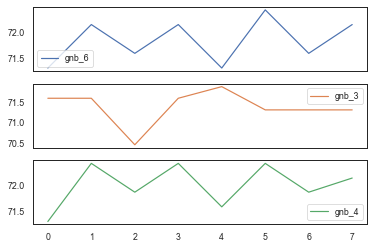

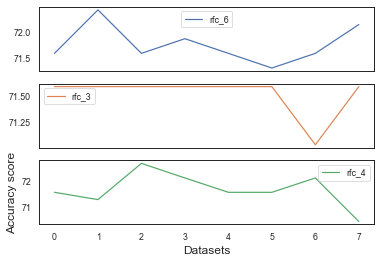

Fig 22: Distribution of Accuracy score for different datasets for GaussianNB and RandomForestClassifier (with 6,3,4 features).


In [139]:
axes = max_n_GNB.plot(rot=1, subplots=True)
axes = max_n_RFC.plot(rot=1, subplots=True)
plt.xlabel('Datasets')
plt.ylabel('Accuracy score')
plt.show()
axes[1].legend(loc=1)
print('Fig 22: Distribution of Accuracy score for different datasets\
 for GaussianNB and RandomForestClassifier (with 6,3,4 features).');